### EDA (Exploratory Data Analysis)

In [40]:
#   Importamos librerias a usar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [41]:
# Abrimos el dataset limpio
data = pd.read_csv('../data/processed/incidencias_asistencia_limpio.csv')
display(data.head())


,Fecha,Hora,Ciudad,Latitud,Longitud,Tipo_Incidencia,Tipo_Vehiculo,Proveedor,Distancia_km,Tiempo_Respuesta_min,Medio_Retorno,Costo_EUR,Resuelto,SLA_45min_Incumplido,Satisfaccion_1a5,Fecha_Hora
0,2024-12-11,20:42:00,Barcelona,41.38918,2.13438,Combustible,SUV,Proveedor B,17.1,21.3,Taxi,19.02,Sí,No,5.0,2024-12-11 20:42:00
1,2025-02-16,21:14:00,Madrid,40.36878,-3.62800,Neumático,SUV,Proveedor A,43.6,37.7,Grúa,103.20,Sí,No,4.4,2025-02-16 21:14:00
2,2024-10-22,07:19:00,Zaragoza,41.61188,-0.88377,Motor,SUV,Proveedor B,14.3,53.0,Grúa,132.82,Sí,Sí,4.2,2024-10-22 07:19:00
3,2025-04-05,17:33:00,Sevilla,37.39681,-5.95097,Neumático,Furgoneta,Proveedor C,25.5,12.1,Grúa,79.25,Sí,No,5.0,2025-04-05 17:33:00
4,2024-10-10,20:44:00,Sevilla,37.41560,-5.90646,Batería,Furgoneta,Proveedor C,23.8,40.3,Retorno Domicilio,39.36,Sí,No,4.4,2024-10-10 20:44:00


In [42]:
# Descripción general de datos
data.info()
data.describe()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fecha                 900 non-null    object 
 1   Hora                  900 non-null    object 
 2   Ciudad                900 non-null    object 
 3   Latitud               900 non-null    float64
 4   Longitud              900 non-null    float64
 5   Tipo_Incidencia       900 non-null    object 
 6   Tipo_Vehiculo         900 non-null    object 
 7   Proveedor             900 non-null    object 
 8   Distancia_km          900 non-null    float64
 9   Tiempo_Respuesta_min  900 non-null    float64
 10  Medio_Retorno         900 non-null    object 
 11  Costo_EUR             900 non-null    float64
 12  Resuelto              900 non-null    object 
 13  SLA_45min_Incumplido  900 non-null    object 
 14  Satisfaccion_1a5      900 non-null    float64
 15  Fecha_Hora            9

Fecha                   0
Hora                    0
Ciudad                  0
Latitud                 0
Longitud                0
Tipo_Incidencia         0
Tipo_Vehiculo           0
Proveedor               0
Distancia_km            0
Tiempo_Respuesta_min    0
Medio_Retorno           0
Costo_EUR               0
Resuelto                0
SLA_45min_Incumplido    0
Satisfaccion_1a5        0
Fecha_Hora              0
dtype: int64

#### Distribuciones básicas

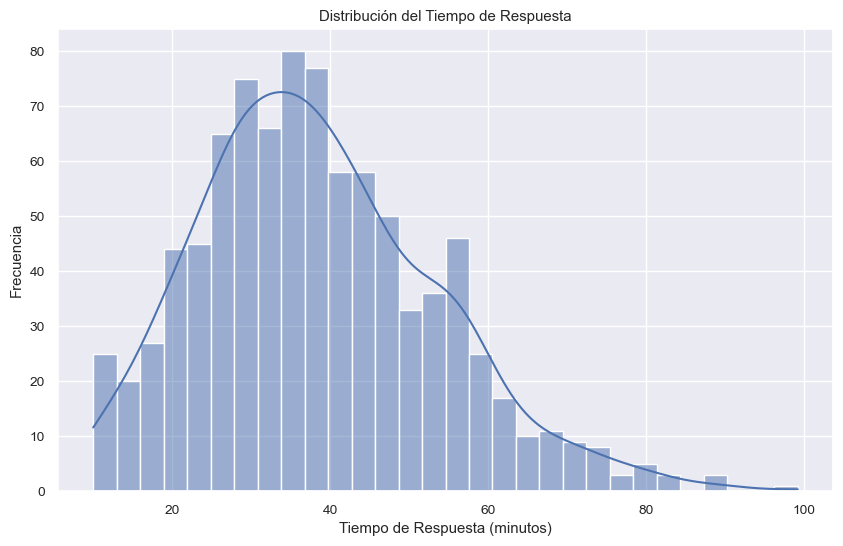

In [61]:
# Histograma del tiempo de respuesta
plt.figure(figsize=(10, 6))
sns.histplot(data['Tiempo_Respuesta_min'], bins=30, kde=True)
plt.title('Distribución del Tiempo de Respuesta')
plt.xlabel('Tiempo de Respuesta (minutos)')
plt.ylabel('Frecuencia')
plt.show()

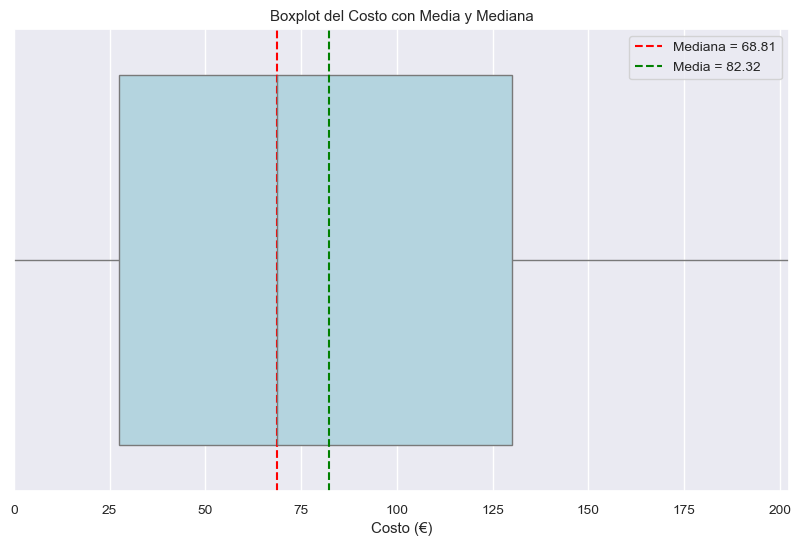

In [44]:
# Boxplot del coste del servicio
plt.figure(figsize=(10, 6))
sns.boxplot(x="Costo_EUR", data=data, color="lightblue")

# Mediana
median = data["Costo_EUR"].median()
plt.axvline(median, color="red", linestyle="--", label=f"Mediana = {median:.2f}")

# Media
mean = data["Costo_EUR"].mean()
plt.axvline(mean, color="green", linestyle="--", label=f"Media = {mean:.2f}")

plt.legend()
plt.title("Boxplot del Costo con Media y Mediana")
plt.xlabel("Costo (€)")
plt.xlim(0, data["Costo_EUR"].quantile(0.95))
plt.show()



C:\Users\marco\AppData\Local\Temp\ipykernel_27288\2744597281.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


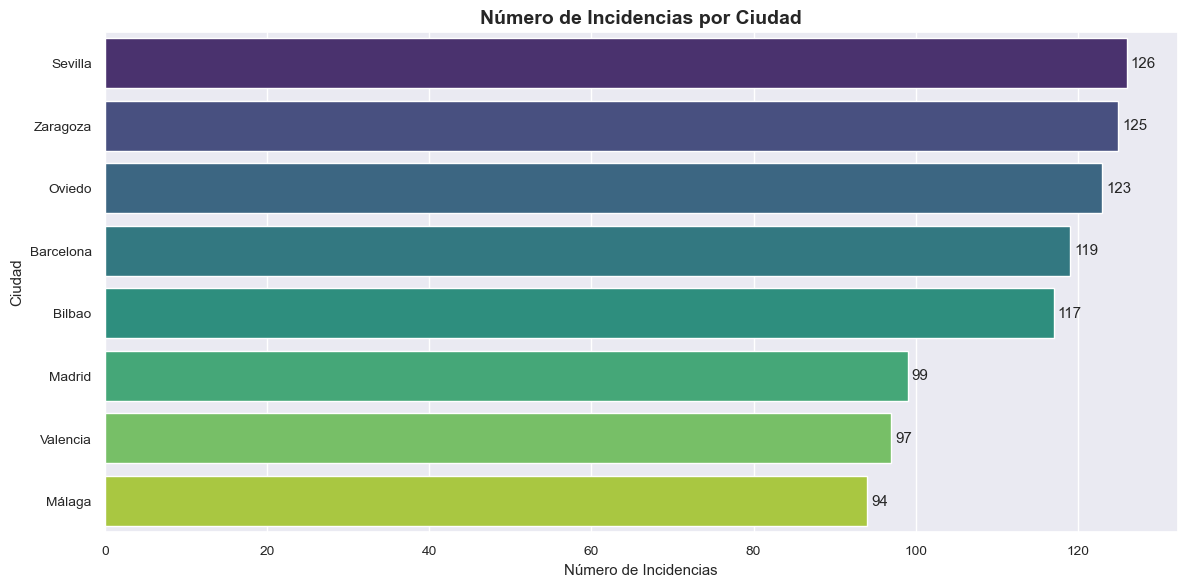

In [45]:
# Crear columna con el número de incidencias por ciudad
conteo = data["Ciudad"].value_counts().rename_axis("Ciudad").reset_index(name="Incidencias")
data = data.merge(conteo, on="Ciudad")

# Conteo de incidencias por ciudad en mapa incluyendo colores según número de incidencias
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    y="Ciudad", data=data,
    order=data["Ciudad"].value_counts().index,
    palette="viridis"
)

# Añadir etiquetas
for container in ax.containers:
    ax.bar_label(container, fmt="%d", label_type="edge", padding=3)

plt.title("Número de Incidencias por Ciudad", fontsize=14, weight="bold")
plt.xlabel("Número de Incidencias")
plt.ylabel("Ciudad")
plt.tight_layout()
plt.show()


C:\Users\marco\AppData\Local\Temp\ipykernel_27288\3111825169.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Conteo", y="Tipo_Incidencia", data=conteo_tipo, palette="magma")


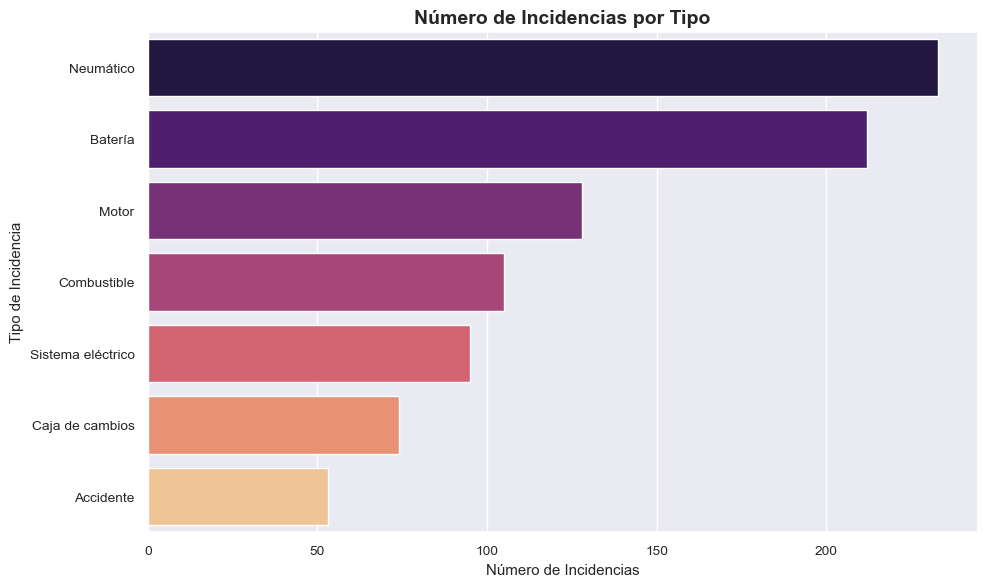

In [46]:
#   Realizamos conteo por tipo de incidencia
conteo_tipo = data["Tipo_Incidencia"].value_counts().rename_axis("Tipo_Incidencia").reset_index(name="Conteo")
plt.figure(figsize=(10, 6))
sns.barplot(x="Conteo", y="Tipo_Incidencia", data=conteo_tipo, palette="magma")
plt.title("Número de Incidencias por Tipo", fontsize=14, weight="bold")
plt.xlabel("Número de Incidencias")
plt.ylabel("Tipo de Incidencia")
plt.tight_layout()
plt.show()

#### Relaciones entre variables

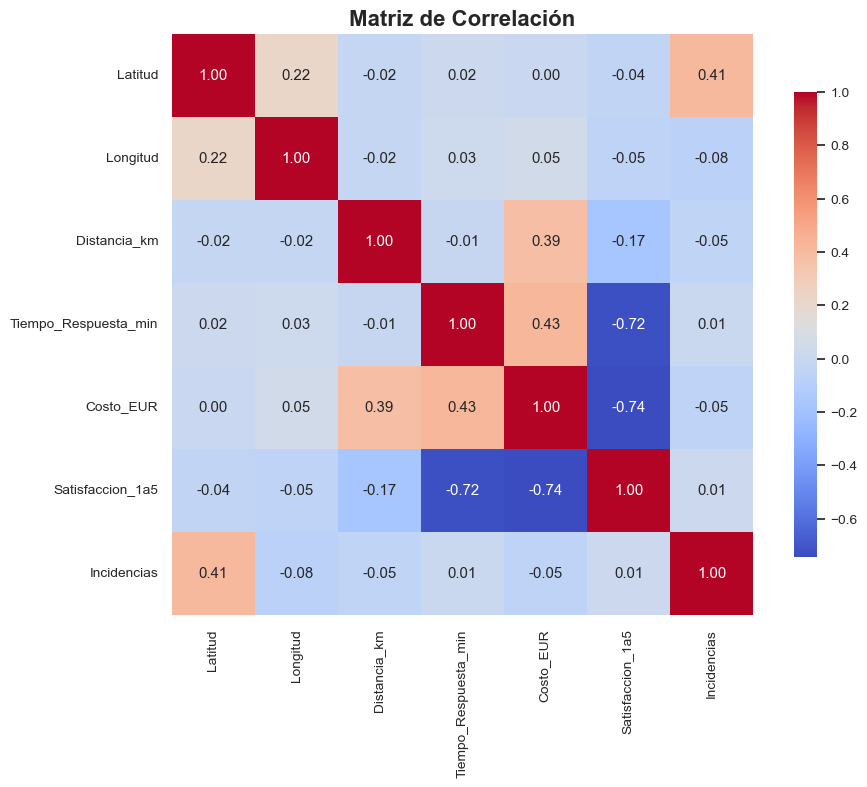

In [47]:
#  Correlacion entre variables numéricas
plt.figure(figsize=(10, 8))
corr = data.select_dtypes(include=["number"]).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Matriz de Correlación", fontsize=16, weight="bold")
plt.tight_layout()
plt.show()

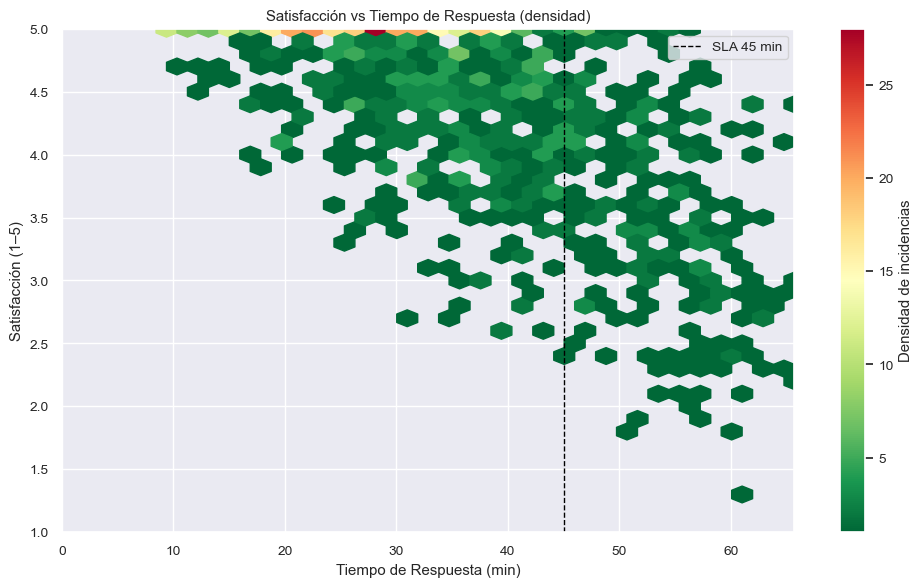

In [52]:
# Relacion entre tiempo de respuesta y satisfacción del cliente
x = data["Tiempo_Respuesta_min"]
y = data["Satisfaccion_1a5"]
q95 = x.quantile(0.95)

plt.figure(figsize=(10, 6))
hb = plt.hexbin(x, y, gridsize=35, cmap="RdYlGn_r",
                extent=(0, q95, 1, 5), mincnt=1)
plt.colorbar(hb, label="Densidad de incidencias")

plt.axvline(45, color="black", linestyle="--", linewidth=1, label="SLA 45 min")
plt.title("Satisfacción vs Tiempo de Respuesta (densidad)")
plt.xlabel("Tiempo de Respuesta (min)")
plt.ylabel("Satisfacción (1–5)")
plt.xlim(0, q95); plt.ylim(1, 5)
plt.legend(); plt.tight_layout(); plt.show()

C:\Users\marco\AppData\Local\Temp\ipykernel_27288\2589748409.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Tipo_Incidencia", y="Costo_EUR", data=data, palette="Set3")


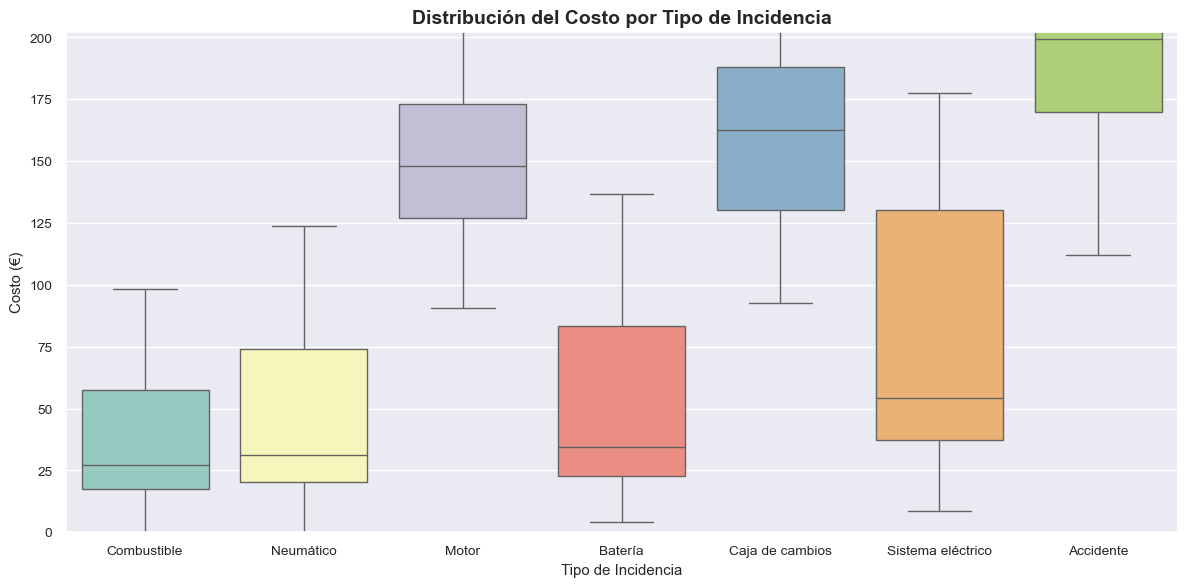

In [53]:
# Comparamos costo con tipo de incidencia
plt.figure(figsize=(12, 6))
sns.boxplot(x="Tipo_Incidencia", y="Costo_EUR", data=data, palette="Set3")
plt.title("Distribución del Costo por Tipo de Incidencia", fontsize=14, weight="bold")
plt.xlabel("Tipo de Incidencia")
plt.ylabel("Costo (€)")
plt.ylim(0, data["Costo_EUR"].quantile(0.95))
plt.tight_layout()
plt.show()

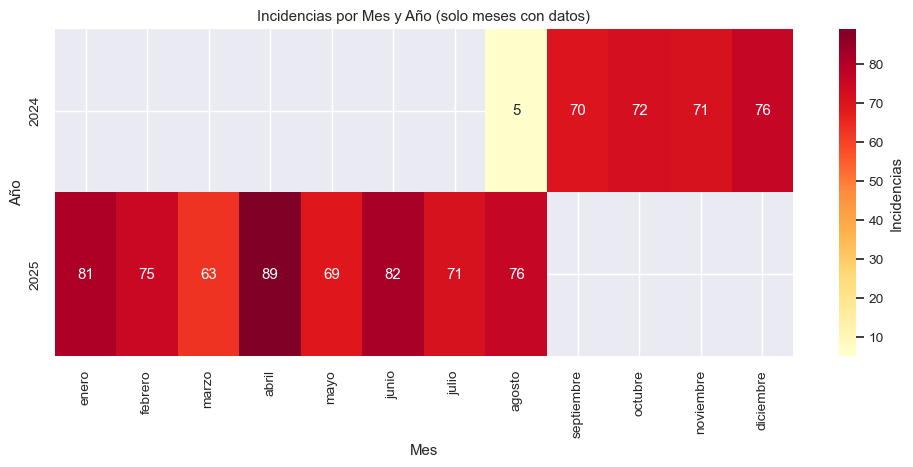

In [59]:
# Incidencias por mes y año


# Partimos de 'data' con Fecha en datetime
data["Fecha"] = pd.to_datetime(data["Fecha"], errors="coerce")

# Agrega por Año–Mes
incidencias_mes = (data.assign(Año=data["Fecha"].dt.year, MesN=data["Fecha"].dt.month)
                     .groupby(["Año","MesN"]).size()
                     .reset_index(name="Incidencias"))

# Nombres de mes en español
meses_es = ["enero","febrero","marzo","abril","mayo","junio",
            "julio","agosto","septiembre","octubre","noviembre","diciembre"]
incidencias_mes["Mes"] = incidencias_mes["MesN"].map(dict(enumerate(meses_es, start=1)))

# Pivot SIN fill_value y orden de columnas por MesN
tabla = incidencias_mes.pivot(index="Año", columns="Mes", values="Incidencias")
orden = {m:i for i,m in enumerate(meses_es)}
tabla = tabla.reindex(columns=sorted(tabla.columns, key=lambda m: orden[m]))

# 🔴 QUEDARTE SOLO CON MESES QUE TENGAN ALGÚN DATO
tabla = tabla.loc[:, tabla.notna().any(axis=0)]
# (opcional) y solo años con datos
tabla = tabla.loc[tabla.notna().any(axis=1)]

plt.figure(figsize=(10, 4 + 0.4*len(tabla.index)))
sns.heatmap(tabla, annot=True, fmt=".0f", cmap="YlOrRd",
            mask=tabla.isna(), cbar_kws={"label": "Incidencias"})
plt.title("Incidencias por Mes y Año (solo meses con datos)")
plt.xlabel("Mes"); plt.ylabel("Año")
plt.tight_layout(); plt.show()


In [60]:
# SLA inclumplido (% de incidencias con tiempo de respuesta > 45 min)
sla_incumplido = (data["Tiempo_Respuesta_min"] > 45).mean() * 100
print(f"SLA Incumplido: {sla_incumplido:.2f}%")


SLA Incumplido: 30.00%


### 📊 Insights Clave

1. **Tiempo de Respuesta**
   - La mayoría de incidencias se atienden entre **25 y 45 minutos**, con un promedio de **38,5 minutos**.
   - Sin embargo, un **30% incumple el SLA de 45 min**, lo que sugiere oportunidades de mejora en eficiencia.

2. **Costes de Incidencias**
   - El coste medio por asistencia es de **176,8 €**, con una alta dispersión entre tipos de incidencias.
   - Los **accidentes y fallos eléctricos** presentan los costes más elevados, mientras que neumáticos y combustible se mantienen en rangos más bajos.

3. **Distribución Geográfica**
   - **Sevilla, Zaragoza y Oviedo** concentran el mayor número de incidencias.
   - Madrid y Valencia aparecen en posiciones medias, lo que refleja cierta dispersión en la carga operativa.

4. **Tipos de Incidencias**
   - Los problemas más frecuentes son **neumáticos, batería y motor**, representando más del **60% del total de casos**.
   - Las incidencias graves (accidentes, caja de cambios) son menos frecuentes, pero implican mayores costes.

5. **Correlaciones**
   - Existe una correlación negativa fuerte entre **tiempo de respuesta y satisfacción del cliente** (-0,72).
   - También se observa una correlación negativa entre **coste y satisfacción** (-0,74), indicando que costes elevados impactan negativamente la experiencia del cliente.

6. **Patrones Temporales**
   - Las incidencias muestran **picos en abril y junio**, y caídas notables en marzo.
   - Esto podría estar relacionado con factores estacionales (clima, viajes, festivos).

7. **Satisfacción del Cliente**
   - La satisfacción se concentra en valores altos (4-5) cuando el tiempo de respuesta es inferior a **45 minutos**.
   - Superar el SLA reduce significativamente la valoración de los clientes.

---

✅ **Conclusión General**:  
El análisis revela que los principales retos en la asistencia en carretera se concentran en **reducir los tiempos de respuesta** y **optimizar los costes de incidencias críticas**. Atacar estas áreas tendría un impacto directo en la satisfacción del cliente y en la eficiencia operativa.


